In [21]:
import pandas as pd

puzzle_rush = pd.read_csv('data/csvs/puzzle_rush_202505.csv')
puzzle_rush.columns = ['Timestamp', 'Mode', 'Score', 'TimeLeft', 'Errors']

puzzle_rush.head()

,Timestamp,Mode,Score,TimeLeft,Errors
0,2025-05-03 12:19:20,3,16,69,3
1,2025-05-03 12:25:38,3,11,55,3
2,2025-05-03 12:25:56,3,16,60,3
3,2025-05-03 12:29:50,3,17,18,3
4,2025-05-03 12:33:56,3,21,0,3


In [22]:
print(puzzle_rush[['Score', 'Errors', 'TimeLeft']].describe())

           Score     Errors   TimeLeft
count  58.000000  58.000000  58.000000
mean   17.534483   3.068966  16.465517
std     2.528542   2.937131  23.815972
min    11.000000   0.000000   0.000000
25%    16.000000   2.000000   0.000000
50%    18.000000   3.000000   0.000000
75%    19.000000   3.000000  27.500000
max    23.000000  17.000000  79.000000


In [23]:
zero_time = puzzle_rush[(puzzle_rush['TimeLeft'] == 0)]
print(f"Zero seconds left: {len(zero_time)} out of {len(puzzle_rush['Timestamp'])} "
      f"({len(zero_time) / len(puzzle_rush['Timestamp']) * 100:.2f}%)")

Zero seconds left: 30 out of 58 (51.72%)


In [24]:
under_15 = puzzle_rush[(puzzle_rush['Score'] <= 15)]
print(f"Below 15 score red line: {len(under_15)} out of {len(puzzle_rush['Timestamp'])} "
      f"({len(under_15) / len(puzzle_rush['Timestamp']) * 100:.2f}%)")

Below 15 score red line: 12 out of 58 (20.69%)


In [25]:
zero_time_no_error = puzzle_rush[(puzzle_rush['TimeLeft'] == 0) & (puzzle_rush['Errors'] == 0)]
print(f"Zero seconds left and zero errors: {len(zero_time_no_error)} out of {len(puzzle_rush['Timestamp'])} "
      f"({len(zero_time_no_error) / len(puzzle_rush['Timestamp']) * 100:.2f}%)")

Zero seconds left and zero errors: 2 out of 58 (3.45%)


I want I a BIG plot for all attempts.  

In [67]:
import os

path = 'data/csvs/'
extension = '.csv'

files = [file for file in os.listdir(path) if file.endswith(extension)]

print(files)

['puzzle_rush_202504.csv', 'puzzle_rush_202505.csv', 'puzzle_rush_202503.csv', 'puzzle_rush_all.csv']


In [72]:
dfs = []

for file in files:
    df = pd.read_csv(os.path.join(path, file), header=None)
    dfs.append(df)

df = pd.concat(dfs)
df.columns = ['Timestamp', 'Mode', 'Score', 'TimeLeft', 'Errors']
df.sort_values(by='Timestamp', inplace=True)

df.head()

,Timestamp,Mode,Score,TimeLeft,Errors
0,2025-03-03 10:35:31,3,20,9,3
1,2025-03-03 10:35:31,3,20,9,3
2,2025-03-03 10:35:31,3,20,9,3
3,2025-03-03 10:35:31,3,20,9,3
1,2025-03-03 10:41:13,3,20,0,3


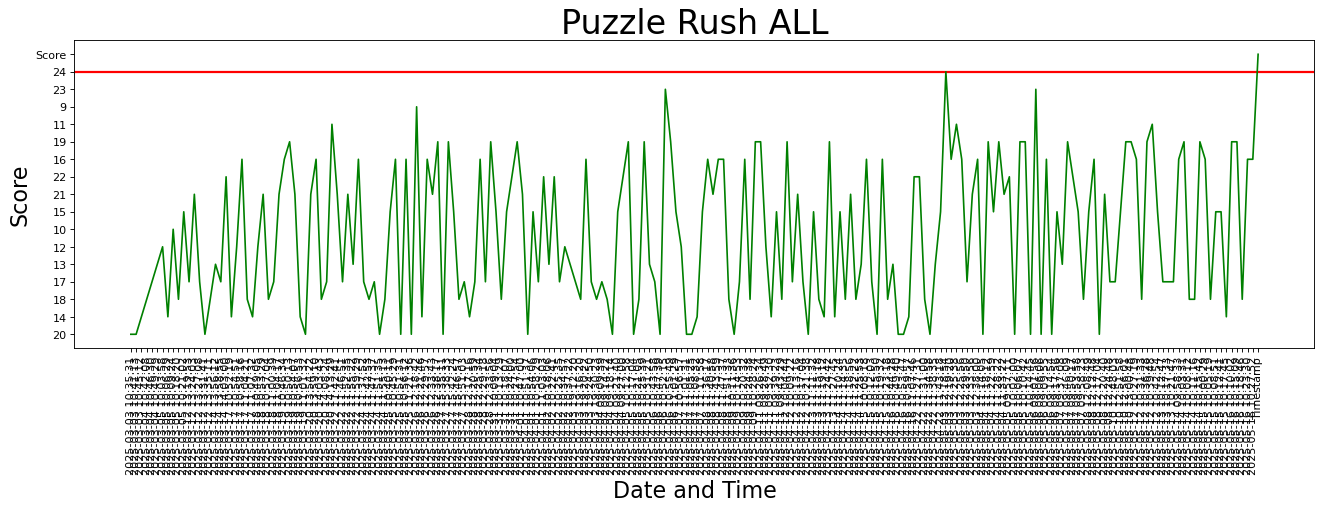

In [69]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20, 5), dpi=80) # fig size

date_time = df['Timestamp'].tolist()
score = df['Score'].tolist()

# cosmetics
plt.title(f"Puzzle Rush ALL", fontsize=30)
plt.xlabel("Date and Time", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.xticks(rotation=90)

# draws one red line on y = 15 
plt.axhline(linewidth=2, color='r', y=15)

# data for the plot
plt.plot(date_time, score, color = 'g', linestyle = 'solid')

# I want to add time and errorless attempts 

plt.savefig('data/pics/puzzle_rush_ALL.png', bbox_inches='tight')
plt.show() 

In [70]:
print(df[['Score', 'Errors', 'TimeLeft']].describe())

        Score  Errors  TimeLeft
count     427     427       427
unique     33      12       134
top        18       3         0
freq       28     123       101
